
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> **02. Fundamentals of Machine Learning: towards gradient descent** </center>



## **Outline**
1. [**Gradient descent method: An Iterative approach**](#Grad)




In [ ]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA2-20231-H1" #@param {type:"string"}
assignment_id = group_id +'.dl_gradient_desc'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **Student:** Mount the Drive  (If you are in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/UIS/Courses/2020-UIS-MachineAnsDeepLearning/ai-2-uis-student')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1NGefTk7hA8tb7ARun-C3IwOn2dGOcicJ/ai-2-uis-student


# **1. Gradient descent method: An Iterative approach** <a name="Grad"> </a>


# $$\omega := \omega - \alpha\nabla J(\omega)$$


#### _**Gradient Descent is the process of minimizing a cost function by following  gradient steps along the cost $J$ function**_


<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/gradientdescent_intuition.gif" width="400"></center>

- We need to know the derivative of cost function (step of algorithm)
- The estimation moves in "direction of gradient"
- $\omega$ values are updated, minimizing the error (loss) of a model on our training data, according to:

$$\omega := \omega - \alpha\nabla J(\omega)$$

-

The parameter $\alpha$ is the **learning rate** (step-size). The influence of  $\alpha$ is illustrated in next picture:

<center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/gradientdescent.gif" width="500"></center>

So, the method can be summarized in the following steps:

**Gradient descent method:**
1. Initialize the coefficients $\omega$
2. Calculating the gradient $\nabla J(\omega)$
3. Updating the coefficients $\omega_{t} := \omega_{t-1} - \alpha\nabla J(\omega_{t-1})$
4. Calculate error tolerance to stop the algorithm $e = \omega_{t}-\omega_{t-1} > tolerance$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now that you know $J(\omega)$ and $\nabla J(\omega)$ **implement gradient descent using loops for training samples**
- Drawn resulting line and minimization function


**POINT-WISE IMPLEMENTATION**

(1000, 1) (1000, 1)


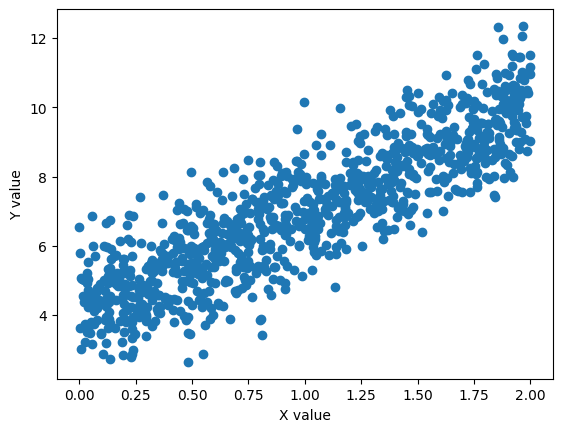

In [ ]:
#@title **Code:** 1. Create simulated data with the coefficients: $w_0 = 4$, $w_1 = 3$
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

w_0 = 4 #@param {type:"number"}
w_1 = 3 #@param {type:"number"}
total_samples = 1000 #@param {type:"number"}

#To always obtain the same response
np.random.seed(0)
X = 2 * np.random.rand(total_samples,1)
y = w_0 + w_1 * X + np.random.randn(total_samples,1)

plt.scatter(X, y);
plt.ylabel('Y value')
plt.xlabel('X value')

print(X.shape, y.shape)

### 1.5 **Define** the cost function: $J(\omega) = \frac{1}{n}\sum_{i}^{n}( y^{i} -\hat{y}_{\omega}(x^{i}) )^{2}$





In [ ]:
#@title **Student code for the solution**
# wirte code Here
def MSE_loss_function(w_0, w_1, X, Y):

  """
  Please write your code here
  """

  return J

print(X.shape, y.shape)

(1000, 1) (1000, 1)
[0.]
[0.25]
0.2701351351351353
[37424.4105286]


In [ ]:
 #@title ## **Send your answer**
student_func_str = inspect.getsource(MSE_loss_function)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.


## 2. **Define** the gradient of cost function: $\nabla J(\omega)$.

Remember and proof general equations:

$$J(w)=\frac{1}{n} \sum_{i=n}(f_w (x_i)-y_i)^2$$
$$f_w (x_i) =w_0 + w_1 x_i $$
$$\frac{\partial J}{\partial w_0}=\frac{2}{n}\sum_{i=n}(f_w(x_i)-y_i)$$
 $$\frac{\partial J}{\partial w_1}=\frac{2}{n}\sum_{i=n}(f_w(x_i)-y_i)x_i$$


In [ ]:
#@title **Student code for the solution**
def compute_MSE_gradients(w_0, w_1, X, Y):

  """
  Please write your code here
  """

  return grad0, grad1

print(X.shape, y.shape)
print(cost_grad_ew(0, 1, np.ones(X.shape), np.ones(y.shape)))
print(cost_grad_ew(0, 0.5, np.ones(X.shape), np.ones(y.shape)))
print(cost_grad_ew(0, 0.1, np.linspace(0, 1, num=1000), np.linspace(0, 1, num=1000)))
print(cost_grad_ew(200, 0.5, X, y))

(1000, 1) (1000, 1)
(array([0.]), array([0.]))
(array([-1.]), array([-1.]))
(-0.8999999999999997, -0.6003003003003001)
(array([386.98269629]), array([382.16992973]))


In [ ]:
 #@title ## **Send your answer**
student_func_str = inspect.getsource(compute_MSE_gradients)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


# 3. **Implement** gradient descent approach updating: $\omega := \omega - \alpha\nabla J(\omega)$ from a element-wise perspective


**Batch** is each step of gradient descent that use all samples of training


In [ ]:
#@title **Student code for the solution**
def compute_MSE_gradient_descent(X, Y, w_0, w_1, alpha, batch):
  #Please copy the implementation of your latest functions inside here
  #(MSE_loss_function and compute_MSE_gradients)
  def MSE_loss_function(w_0, w_1, X, Y):
      """Please write your code here"""
      return error / (X.shape[0])

  def compute_MSE_gradients(w_0, w_1, X, Y):
      """Please write your code here"""
      return grad0, grad1

  hist_coste = []
  for i in range(batch):

    """Please write your code here"""

    cost_i =
    hist_coste.append(      )
    w_0_grad, w_1_grad =
    w_0 =
    w_1 =
    cost_ip =

    if (cost_i-cost_ip).all() < 1e-08 :
      #print("batch_i: ", i, "tolerance is satisfied: ", cost_i-cost_ip, "cost: ", cost_ip)
      break
    #print("batch: ", i, "error: " , (cost_i-cost_ip ))

  print("batch: ", i, "cost: ", MSE_loss_function(w_0, w_1, X, Y))
  return w_0, w_1, hist_coste

print(f'X shape: {X.shape} | Y shape: {y.shape}')
print('We are training the model! ...')
w_0,w_1, hist_coste = compute_MSE_gradient_descent(X, y, 1, -1, 0.1, 500)
print(f'\n--> We obtained W0 = {w_0}, and W1 = {w_1}')

In [ ]:
 #@title ## **send your answer**
student_func_str = inspect.getsource(compute_MSE_gradient_descent)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Use the artifitial dataset `make_regression` from *sklearn* to test your code🤗.

For this:
  - Load the dataset.
  - Use the ``compute_MSE_gradient_descent`` function.
  - At the end try to plot the fit of the regression and the Loss curve.

Questions:

* What happen if we vary for diferent values of $\alpha$ ??
* How many steps are necessary to converge?

In [ ]:
#@title **Student code for the solution**

"""
Please write your code here.

Hint! Don't forget:
* Put a seed.
* Standarize the data. (Why??)

"""


Evaluate the implementation on the dataset [**The Boston Housing Dataset**](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

- $(\mathbf{\hat{Y}})$ is the Median value of owner-occupied homes in $\$1000s$
- $(\mathbf{\hat{X}})$ is the Percentage of lower status population

In [ ]:
#@title Uploading the Boston housting dataset
# select variable of interest and reshape for matrix operation

# Loading the dataset
boston_dataset = pd.read_csv('/content/drive/MyDrive/UIS/Courses/2020-UIS-MachineAnsDeepLearning/ai-2-uis-professor/data/BostonHousing.csv')

# Select variable of interest
X = boston_dataset['lstat'].values
# Select variable to predict
Y = boston_dataset['medv'].values

print("X: ", X.shape, "Y: ", Y.shape)
print(boston_dataset.shape)
boston_dataset.head()

X:  (506,) Y:  (506,)
(506, 14)


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

batch:  29 cost:  0.00016532795228548484
w_0:  0.07009969001227997  w_1:  -0.5909297403452756
(506,) (506,)


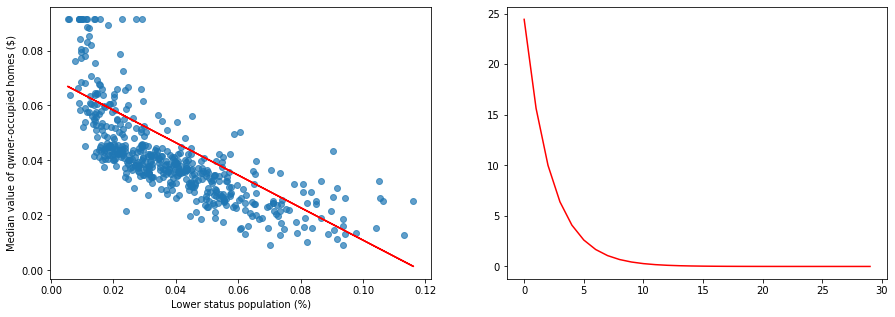

In [ ]:
#@title Showing the linear regression of the Boston housing dataframe

#test data
X = boston_dataset['lstat'].values
# Select variable to predict
Y = boston_dataset['medv'].values
X = X/np.linalg.norm(X) ; Y= Y/np.linalg.norm(Y)

# Computing the MSE gradient descent
w_0, w_1, hist_coste = compute_MSE_gradient_descent(X, Y, 5, -0.4, 0.1, 30)
print("w_0: ", w_0, " w_1: ", w_1)

# Estimating the line
y_est = w_0 + w_1 * X
print(y_est.shape, X.shape)

# Plotting the linear regression
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X, Y, alpha=0.7)
ax.plot(X , y_est, c="red")
ax.set_ylabel('Median value of qwner-occupied homes ($)')
ax.set_xlabel('Lower status population (%)')
ax = fig.add_subplot(1, 2, 2)
ax.plot(range(len(hist_coste)) , hist_coste, c="red")

# **Conclusions**

- In a **CLOSE SOLUTION** is not necesary to iterate
- **BUT** need to compute $(X^{T}X)^{-1}$ that is $O(n^3)$
- It is **very SLOW** if **N** is  **LARGE**

- Gradient descent need to choose $\alpha$
- Need many iterations
- Works well when **N** is **LARGE**



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- What about element-wise operation? Implement the gradient descent version using element-wise approach

- Compare time responses

- Compare with well-known approches, such as ``LinearRegression`` sklearn function.


# **References**

[1. Introduction to Deep Learning From Logical Calculus to Artificial Intelligence](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2016_Book_IntroductionToStatisticsAndDat.pdf)

[2. Introduction to Data Science A Python Approach to Concepts, Techniques and Applications ](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2017_Book_IntroductionToDataScience.pdf)



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">